In [1]:
#Data wrangling

In [3]:
# Load the dataset 
import pandas as pd
papers = pd.read_csv('arxiv_data.csv')
print("Dataset loaded successfully!")
papers.head()

Dataset loaded successfully!


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [4]:
print("Dataset shape:", papers.shape)
print("Column names:", papers.columns)

Dataset shape: (51774, 3)
Column names: Index(['titles', 'summaries', 'terms'], dtype='object')


In [5]:
import ast
description_category = papers[['terms', 'summaries', 'titles']]
description_category['terms'] = description_category['terms'].apply(lambda x: ast.literal_eval(x))

In [6]:
columns = [f'category_{i+1}' for i in range(11)]
cat = pd.DataFrame(description_category['terms'].to_list(), columns=columns)
cat

,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11
0,cs.CV,cs.LG,None,None,None,None,None,None,None,None,None
1,cs.CV,cs.AI,cs.LG,None,None,None,None,None,None,None,None
2,cs.CV,cs.AI,None,None,None,None,None,None,None,None,None
3,cs.CV,None,None,None,None,None,None,None,None,None,None
4,cs.CV,cs.LG,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
51769,stat.ML,physics.bio-ph,q-bio.QM,None,None,None,None,None,None,None,None
51770,cs.CV,cs.DM,None,None,None,None,None,None,None,None,None
51771,stat.ML,cs.LG,q-bio.GN,None,None,None,None,None,None,None,None
51772,cs.CV,None,None,None,None,None,None,None,None,None,None


In [7]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
genres = np.concatenate([cat[col].unique() for col in columns])
genres = list(dict.fromkeys(genres))
genres = [x for x in genres if x is not None]

cat = pd.concat([cat, pd.DataFrame(columns=genres)])
cat.fillna(0, inplace=True)
cat.head()

,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,...,"68T07 (Primary) 46N10, 94A17 (Secondary)",G.1.2; G.1.6; G.2.1; G.3; I.2.0; I.2.6; I.2.8; I.5.1; I.6; I.6.4,D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3,I.2.6; I.2.4; I.5.3,"62M10, 62J07, 62P30, 62P12, 37M10",G.3; I.2.3; I.2.6; J.4,G.3; I.2.3; I.2.6; I.2.11; J.4,G.1.3; G.3; I.2.6; I.5.1,I.2.6; G.1.8; G.2.2; I.5.3; I.4.0,I.4.3; G.1.3
0,cs.CV,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cs.CV,cs.AI,cs.LG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cs.CV,cs.AI,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cs.CV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cs.CV,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cat.isnull().sum()

category_1                           0
category_2                           0
category_3                           0
category_4                           0
category_5                           0
                                    ..
G.3; I.2.3; I.2.6; J.4               0
G.3; I.2.3; I.2.6; I.2.11; J.4       0
G.1.3; G.3; I.2.6; I.5.1             0
I.2.6; G.1.8; G.2.2; I.5.3; I.4.0    0
I.4.3; G.1.3                         0
Length: 1110, dtype: int64

In [9]:
#one hot encoding
for col in columns:
    for idx, genre in cat[col].dropna().items():
        if genre != 0:
            cat.at[idx, genre] = 1

In [10]:
description_category_new = pd.concat([description_category['titles'],description_category['summaries'],
                                     cat.loc[:,"cs.CV":]],
                                    axis=1)
description_category_new.head()

,titles,summaries,cs.CV,cs.LG,stat.ML,cs.AI,cs.HC,"68U10, 62M05, 62H30, 65C20",cs.NE,physics.geo-ph,...,"68T07 (Primary) 46N10, 94A17 (Secondary)",G.1.2; G.1.6; G.2.1; G.3; I.2.0; I.2.6; I.2.8; I.5.1; I.6; I.6.4,D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3,I.2.6; I.2.4; I.5.3,"62M10, 62J07, 62P30, 62P12, 37M10",G.3; I.2.3; I.2.6; J.4,G.3; I.2.3; I.2.6; I.2.11; J.4,G.1.3; G.3; I.2.6; I.5.1,I.2.6; G.1.8; G.2.2; I.5.3; I.4.0,I.4.3; G.1.3
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Data visualization

In [12]:
#category vs count
import matplotlib.pyplot as plt
bar_plot = pd.DataFrame()
bar_plot['cat'] = description_category_new.columns[2:]
bar_plot['count'] = description_category_new.iloc[:,2:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

,cat,count
0,cs.CV,30413
1,cs.LG,29067
2,stat.ML,15578
3,cs.AI,7944
4,eess.IV,2484


In [13]:
# Threshold for main categories
threshold = 1000
main_categories = bar_plot[bar_plot['count'] > threshold]
categories = main_categories['cat'].values
categories = np.append(categories, 'Others')
not_category = []
description_category_new['Others'] = 0

for i in description_category_new.columns[2:]:
    if i not in categories:
        description_category_new.loc[description_category_new[i] == 1, 'Others'] = 1
        not_category.append(i)
description_category_new.drop(not_category, axis=1, inplace=True)

In [14]:
# Plot Most Common Categories after dropping rare ones
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = description_category_new.columns[2:]
most_common_cat['count'] = description_category_new.iloc[:, 2:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

,cat,count
0,cs.CV,30413
1,cs.LG,29067
2,stat.ML,15578
3,Others,10223
4,cs.AI,7944


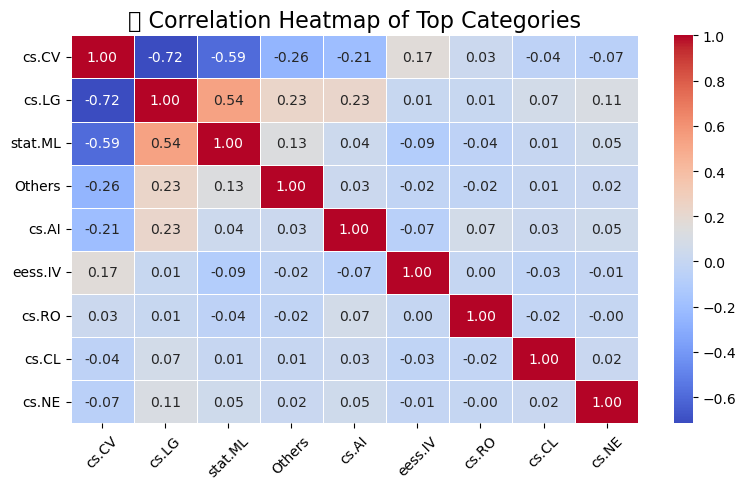

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for top N categories (e.g., top 10)
top_n = 10
top_categories = most_common_cat['cat'][:top_n]
category_corr = description_category_new[top_categories].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(category_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("🔗 Correlation Heatmap of Top Categories", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


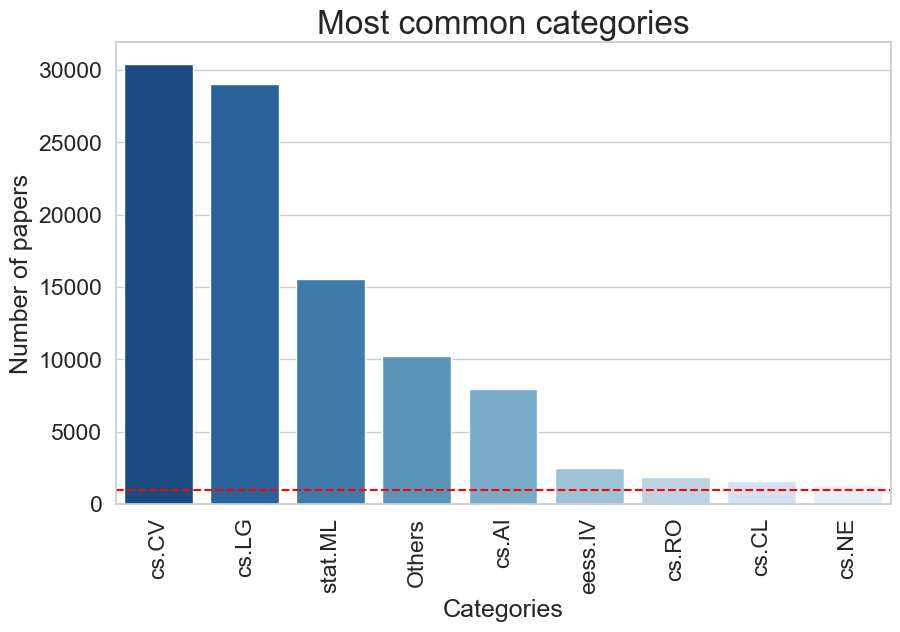

In [18]:
# Visualization Plot 1: Number of papers per main category
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

pal = sns.color_palette("Blues_r", len(most_common_cat))
rank = most_common_cat['count'].argsort().argsort()

sns.barplot(x=most_common_cat['cat'], y=most_common_cat['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most common categories", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Categories', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

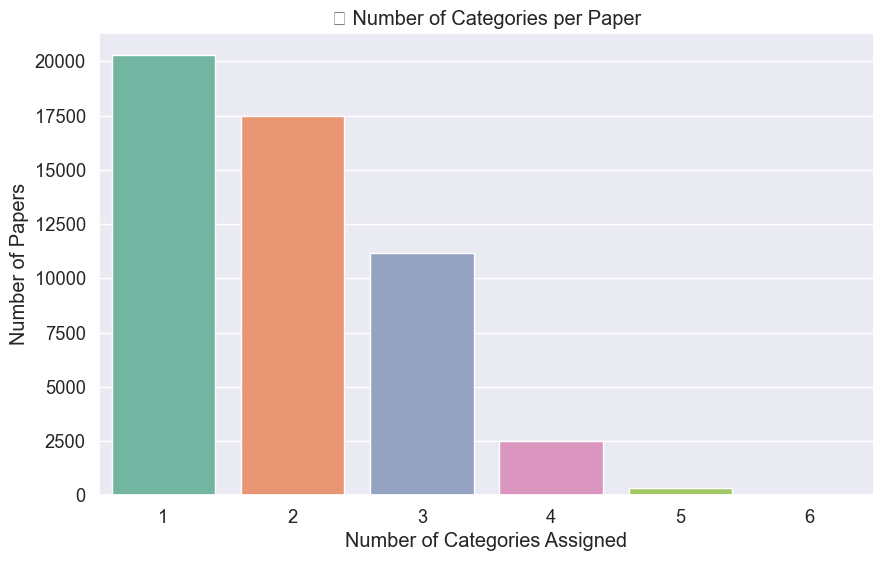

In [19]:
#Visualization Plot 2: Number of categories assigned per paper
rowSums = description_category_new.iloc[:, 2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
palette = sns.color_palette("Set2", len(multiLabel_counts))
sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values, palette=palette)

plt.title("📑 Number of Categories per Paper")
plt.xlabel("Number of Categories Assigned")
plt.ylabel("Number of Papers")
plt.show()

In [20]:
columns=['OneVsAll', 'BinaryRelevance', 'ClassifierChain', 'MultipleOutput','DNN', 'CNN', 'LSTM']
results = pd.DataFrame(columns=columns)
results

seeds = [1, 43, 678, 90, 135, 999]
t = results.copy()
t

,OneVsAll,BinaryRelevance,ClassifierChain,MultipleOutput,DNN,CNN,LSTM


In [21]:
#Data preprocessing

In [22]:
import re
import nltk
from nltk.corpus import stopwords
def decontract(sentence):
    # specific
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)

In [25]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

re_stop_words = re.compile(r"\b(" + "|".join(stopwords) + ")\\W", re.I)

In [26]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [27]:
description_category_new['summaries'] = description_category_new['summaries'].str.lower()
description_category_new['summaries'] = description_category_new['summaries'].apply(decontract)
description_category_new['summaries'] = description_category_new['summaries'].apply(cleanPunc)
description_category_new['summaries'] = description_category_new['summaries'].apply(keepAlpha)
description_category_new['summaries'] = description_category_new['summaries'].apply(removeStopWords)
description_category_new['summaries'] = description_category_new['summaries'].apply(stemming)

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel = MultiLabelBinarizer(classes=description_category_new.columns[2:].tolist())
multilabel.fit(description_category_new[description_category_new.columns[2:]])

MultiLabelBinarizer(classes=['cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'cs.NE',
                             'cs.RO', 'eess.IV', 'cs.CL', 'Others'])

In [29]:
y = description_category_new.columns[2:]
y
multilabel.classes_

array(['cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'cs.NE', 'cs.RO', 'eess.IV',
       'cs.CL', 'Others'], dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(description_category_new['summaries'],
                                                    description_category_new[description_category_new.columns[2:]],
                                                    test_size=0.3,
                                                    random_state=seeds[4],
                                                    shuffle=True)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

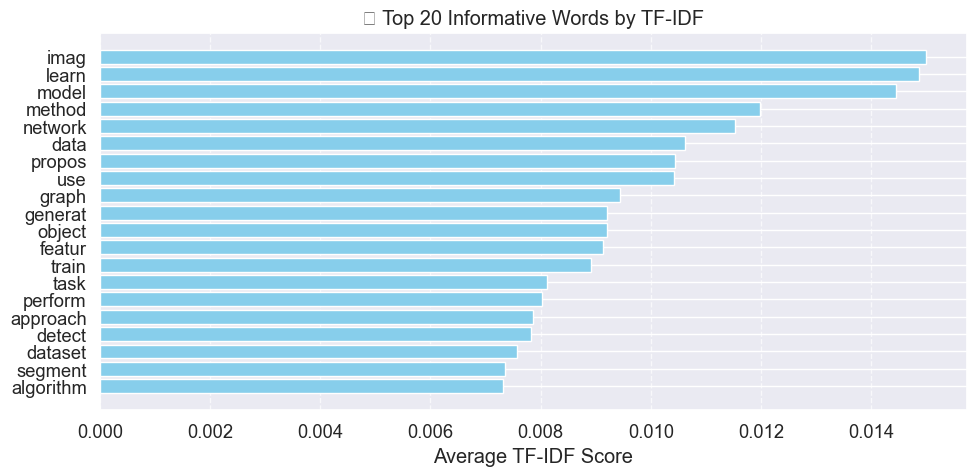

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Get average TF-IDF score per term in training data
avg_tfidf = np.asarray(X_train.mean(axis=0)).flatten()
terms = vectorizer.get_feature_names_out()

# Sort and get top 20 informative terms
top_indices = np.argsort(avg_tfidf)[-20:]
top_terms = [terms[i] for i in top_indices]
top_scores = avg_tfidf[top_indices]

plt.figure(figsize=(10, 5))
plt.barh(top_terms, top_scores, color='skyblue')
plt.xlabel('Average TF-IDF Score')
plt.title('📊 Top 20 Informative Words by TF-IDF')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Container for all models
trained_log_models = {}
trained_nb_models = {}
trained_svm_models = {}
trained_rf_models = {}

# Train all models
for category in y_train.columns:
    print(f"\nTraining for category: {category}")

    # Logistic Regression
    log_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='sag', n_jobs=-1))
    log_clf.fit(X_train, y_train[category])
    trained_log_models[category] = log_clf

    # Naive Bayes
    nb_clf = OneVsRestClassifier(MultinomialNB())
    nb_clf.fit(X_train, y_train[category])
    trained_nb_models[category] = nb_clf

    # SVM
    svm_clf = OneVsRestClassifier(LinearSVC())
    svm_clf.fit(X_train, y_train[category])
    trained_svm_models[category] = svm_clf

    # Random Forest
    rf_clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))
    rf_clf.fit(X_train, y_train[category])
    trained_rf_models[category] = rf_clf



Training for category: cs.CV

Training for category: cs.LG

Training for category: stat.ML

Training for category: cs.AI

Training for category: cs.NE

Training for category: cs.RO

Training for category: eess.IV

Training for category: cs.CL

Training for category: Others


In [54]:
def evaluate_model(models_dict, X_train, y_train, X_test, y_test):
    overall_accuracy = 0
    training_accuracy = 0
    y_true_all = []
    y_pred_all = []

    for category in y_test.columns:
        model = models_dict[category]
        y_test_cat = y_test[category].astype(int)
        y_train_cat = y_train[category].astype(int)

        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        y_true_all.extend(y_test_cat)
        y_pred_all.extend(pred_test)

        overall_accuracy += accuracy_score(y_test_cat, pred_test)
        training_accuracy += accuracy_score(y_train_cat, pred_train)

    num_categories = len(y_test.columns)
    avg_test_acc = overall_accuracy / num_categories
    avg_train_acc = training_accuracy / num_categories
    f1 = f1_score(y_true_all, y_pred_all, average='weighted')
    prec = precision_score(y_true_all, y_pred_all, average='weighted')
    rec = recall_score(y_true_all, y_pred_all, average='weighted')

    print(f"\n Average Test Accuracy   : {avg_test_acc:.4f}")
    print(f" Average Train Accuracy  : {avg_train_acc:.4f}")
    print(f" Weighted F1-score       : {f1:.4f}")
    print(f" Weighted Precision      : {prec:.4f}")
    print(f" Weighted Recall         : {rec:.4f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_true_all, y_pred_all))


In [55]:
print("\n🔍 Logistic Regression Evaluation")
evaluate_model(trained_log_models, X_train, y_train, X_test, y_test)

print("\n🔍 Naive Bayes Evaluation")
evaluate_model(trained_nb_models, X_train, y_train, X_test, y_test)

print("\n🔍 SVM Evaluation")
evaluate_model(trained_svm_models, X_train, y_train, X_test, y_test)

print("\n🔍 Random Forest Evaluation")
evaluate_model(trained_rf_models, X_train, y_train, X_test, y_test)



🔍 Logistic Regression Evaluation

 Average Test Accuracy   : 0.9095
 Average Train Accuracy  : 0.9350
 Weighted F1-score       : 0.9054
 Weighted Precision      : 0.9072
 Weighted Recall         : 0.9095

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    109699
           1       0.87      0.68      0.76     30098

    accuracy                           0.91    139797
   macro avg       0.89      0.83      0.85    139797
weighted avg       0.91      0.91      0.91    139797


🔍 Naive Bayes Evaluation

 Average Test Accuracy   : 0.8810
 Average Train Accuracy  : 0.9031
 Weighted F1-score       : 0.8728
 Weighted Precision      : 0.8763
 Weighted Recall         : 0.8810

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    109699
           1       0.82      0.57      0.67     30098

    accuracy                           0.88    139797
 

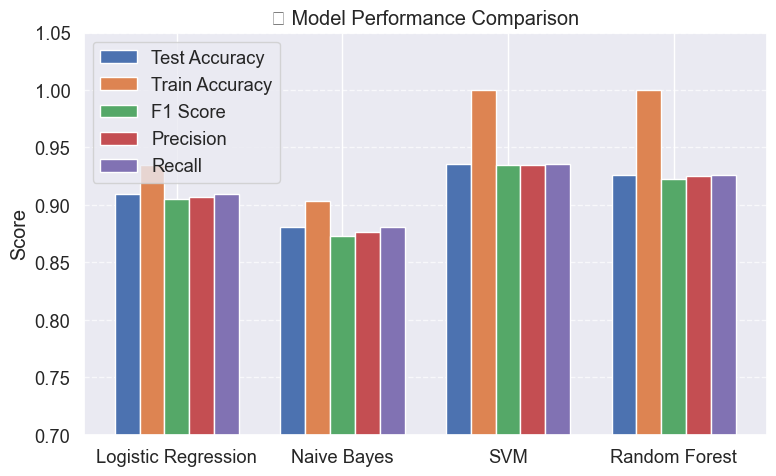

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Actual results you provided
metrics_summary = {
    'Logistic Regression': {
        'avg_test_acc': 0.9095,
        'avg_train_acc': 0.9350,
        'f1_score': 0.9054,
        'precision': 0.9072,
        'recall': 0.9095
    },
    'Naive Bayes': {
        'avg_test_acc': 0.8810,
        'avg_train_acc': 0.9031,
        'f1_score': 0.8728,
        'precision': 0.8763,
        'recall': 0.8810
    },
    'SVM': {
        'avg_test_acc': 0.9356,
        'avg_train_acc': 0.9999,
        'f1_score': 0.9344,
        'precision': 0.9344,
        'recall': 0.9356
    },
    'Random Forest': {
        'avg_test_acc': 0.9258,
        'avg_train_acc': 0.9999,
        'f1_score': 0.9227,
        'precision': 0.9250,
        'recall': 0.9258
    }
}

# Prepare data for plotting
model_names = list(metrics_summary.keys())
f1_scores = [metrics_summary[m]['f1_score'] for m in model_names]
precisions = [metrics_summary[m]['precision'] for m in model_names]
recalls = [metrics_summary[m]['recall'] for m in model_names]
test_accuracies = [metrics_summary[m]['avg_test_acc'] for m in model_names]
train_accuracies = [metrics_summary[m]['avg_train_acc'] for m in model_names]

# Plot comparison
x = np.arange(len(model_names))
width = 0.15

plt.figure(figsize=(8, 5))
plt.bar(x - 2*width, test_accuracies, width, label='Test Accuracy')
plt.bar(x - width, train_accuracies, width, label='Train Accuracy')
plt.bar(x, f1_scores, width, label='F1 Score')
plt.bar(x + width, precisions, width, label='Precision')
plt.bar(x + 2*width, recalls, width, label='Recall')

plt.xticks(x, model_names)
plt.ylabel("Score")
plt.title("🔍 Model Performance Comparison")
plt.ylim(0.7, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

trained_models = {}
label_encoders = {}
C_values = [0.001, 0.01, 0.1, 1]

for category in description_category_new.columns[2:]:
    print(f" Training model for category: {category}")

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train[category])
    label_encoders[category] = label_encoder

    # Resample once per category
    oversample = RandomOverSampler(random_state=42)
    X_res, y_res = oversample.fit_resample(X_train, y_train_encoded)

    best_model = None
    best_acc = 0
    best_C = None

    for C in C_values:
        clf = OneVsRestClassifier(LogisticRegression(C=C, solver='sag', max_iter=1000), n_jobs=-1)
        clf.fit(X_res, y_res)

        pred_train = clf.predict(X_res)
        acc = accuracy_score(y_res, pred_train)

        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_model = clf

    trained_models[category] = best_model
    print(f" {category}: Best C={best_C}, Resampled Train Acc={best_acc:.4f}")


 Training model for category: cs.CV
 cs.CV: Best C=1, Resampled Train Acc=0.9691
 Training model for category: cs.LG
 cs.LG: Best C=1, Resampled Train Acc=0.9279
 Training model for category: stat.ML
 stat.ML: Best C=1, Resampled Train Acc=0.9308
 Training model for category: cs.AI
 cs.AI: Best C=1, Resampled Train Acc=0.9738
 Training model for category: cs.NE
 cs.NE: Best C=1, Resampled Train Acc=0.9991
 Training model for category: cs.RO
 cs.RO: Best C=1, Resampled Train Acc=0.9942
 Training model for category: eess.IV
 eess.IV: Best C=1, Resampled Train Acc=0.9973
 Training model for category: cs.CL
 cs.CL: Best C=1, Resampled Train Acc=0.9943
 Training model for category: Others
 Others: Best C=1, Resampled Train Acc=0.9699


In [52]:


from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
overall_accuracy = 0
training_accuracy = 0
y_true_all = []
y_pred_all = []

for category in description_category_new.columns[2:]:
    model = trained_models[category]
    encoder = label_encoders[category]

    y_test_enc = encoder.transform(y_test[category])
    y_train_enc = encoder.transform(y_train[category])

    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train)

    y_true_all.extend(y_test_enc)
    y_pred_all.extend(pred_test)

    overall_accuracy += accuracy_score(y_test_enc, pred_test)
    training_accuracy += accuracy_score(y_train_enc, pred_train)

# Averages
num_categories = len(description_category_new.columns[2:])
avg_test_acc = overall_accuracy / num_categories
avg_train_acc = training_accuracy / num_categories

# Report
print(f"\n Average Test Accuracy   : {avg_test_acc:.4f}")
print(f" Average Train Accuracy  : {avg_train_acc:.4f}")

# Metrics
f1 = f1_score(y_true_all, y_pred_all, average='weighted')
prec = precision_score(y_true_all, y_pred_all, average='weighted')
rec = recall_score(y_true_all, y_pred_all, average='weighted')

print(f"Weighted F1-score         : {f1:.4f}")
print(f"Weighted Precision        : {prec:.4f}")
print(f"Weighted Recall           : {rec:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_true_all, y_pred_all))


 Average Test Accuracy   : 0.9096
 Average Train Accuracy  : 0.9660
Weighted F1-score         : 0.9109
Weighted Precision        : 0.9129
Weighted Recall           : 0.9096

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    109699
           1       0.77      0.83      0.80     30098

    accuracy                           0.91    139797
   macro avg       0.86      0.88      0.87    139797
weighted avg       0.91      0.91      0.91    139797



In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.multiclass import OneVsRestClassifier

trained_nb_models = {}
alpha_values = [0.01, 0.1, 1, 10]

for category in description_category_new.columns[2:]:
    print(f"\n Training Naive Bayes model for category: {category}")

    # Binary target for this category
    y_train_cat = y_train[category].astype(int)

    # Resample
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X_train, y_train_cat)

    # Hyperparameter tuning
    best_model = None
    best_acc = 0
    best_alpha = None

    for alpha in alpha_values:
        clf = OneVsRestClassifier(MultinomialNB(alpha=alpha))
        clf.fit(X_res, y_res)
        pred_train = clf.predict(X_res)
        acc = accuracy_score(y_res, pred_train)

        if acc > best_acc:
            best_acc = acc
            best_alpha = alpha
            best_model = clf

    trained_nb_models[category] = best_model
    print(f" {category}: Best alpha={best_alpha}, Resampled Train Acc={best_acc:.4f}")



 Training Naive Bayes model for category: cs.CV
 cs.CV: Best alpha=0.01, Resampled Train Acc=1.0000

 Training Naive Bayes model for category: cs.LG
 cs.LG: Best alpha=0.01, Resampled Train Acc=0.9998

 Training Naive Bayes model for category: stat.ML
 stat.ML: Best alpha=0.01, Resampled Train Acc=0.9997

 Training Naive Bayes model for category: cs.AI
 cs.AI: Best alpha=0.01, Resampled Train Acc=0.9997

 Training Naive Bayes model for category: cs.NE
 cs.NE: Best alpha=0.01, Resampled Train Acc=0.9999

 Training Naive Bayes model for category: cs.RO
 cs.RO: Best alpha=0.01, Resampled Train Acc=0.9999

 Training Naive Bayes model for category: eess.IV
 eess.IV: Best alpha=0.01, Resampled Train Acc=0.9998

 Training Naive Bayes model for category: cs.CL
 cs.CL: Best alpha=0.01, Resampled Train Acc=0.9999

 Training Naive Bayes model for category: Others
 Others: Best alpha=0.01, Resampled Train Acc=0.9999


In [54]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

overall_accuracy = 0
training_accuracy = 0
y_true_all = []
y_pred_all = []

for category in description_category_new.columns[2:]:
    model = trained_nb_models[category]  # Naive Bayes models
    y_test_cat = y_test[category].astype(int)
    y_train_cat = y_train[category].astype(int)

    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train)

    y_true_all.extend(y_test_cat)
    y_pred_all.extend(pred_test)

    overall_accuracy += accuracy_score(y_test_cat, pred_test)
    training_accuracy += accuracy_score(y_train_cat, pred_train)

# Averages
num_categories = len(description_category_new.columns[2:])
avg_test_acc = overall_accuracy / num_categories
avg_train_acc = training_accuracy / num_categories

# Report
print(f"\n Average Test Accuracy   : {avg_test_acc:.4f}")
print(f" Average Train Accuracy  : {avg_train_acc:.4f}")

# Metrics
f1 = f1_score(y_true_all, y_pred_all, average='weighted')
prec = precision_score(y_true_all, y_pred_all, average='weighted')
rec = recall_score(y_true_all, y_pred_all, average='weighted')

print(f"\n Weighted F1-score      : {f1:.4f}")
print(f" Weighted Precision     : {prec:.4f}")
print(f" Weighted Recall        : {rec:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_true_all, y_pred_all))



 Average Test Accuracy   : 0.9336
 Average Train Accuracy  : 0.9998

 Weighted F1-score      : 0.9321
 Weighted Precision     : 0.9323
 Weighted Recall        : 0.9336

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    109699
           1       0.89      0.79      0.84     30098

    accuracy                           0.93    139797
   macro avg       0.92      0.88      0.90    139797
weighted avg       0.93      0.93      0.93    139797



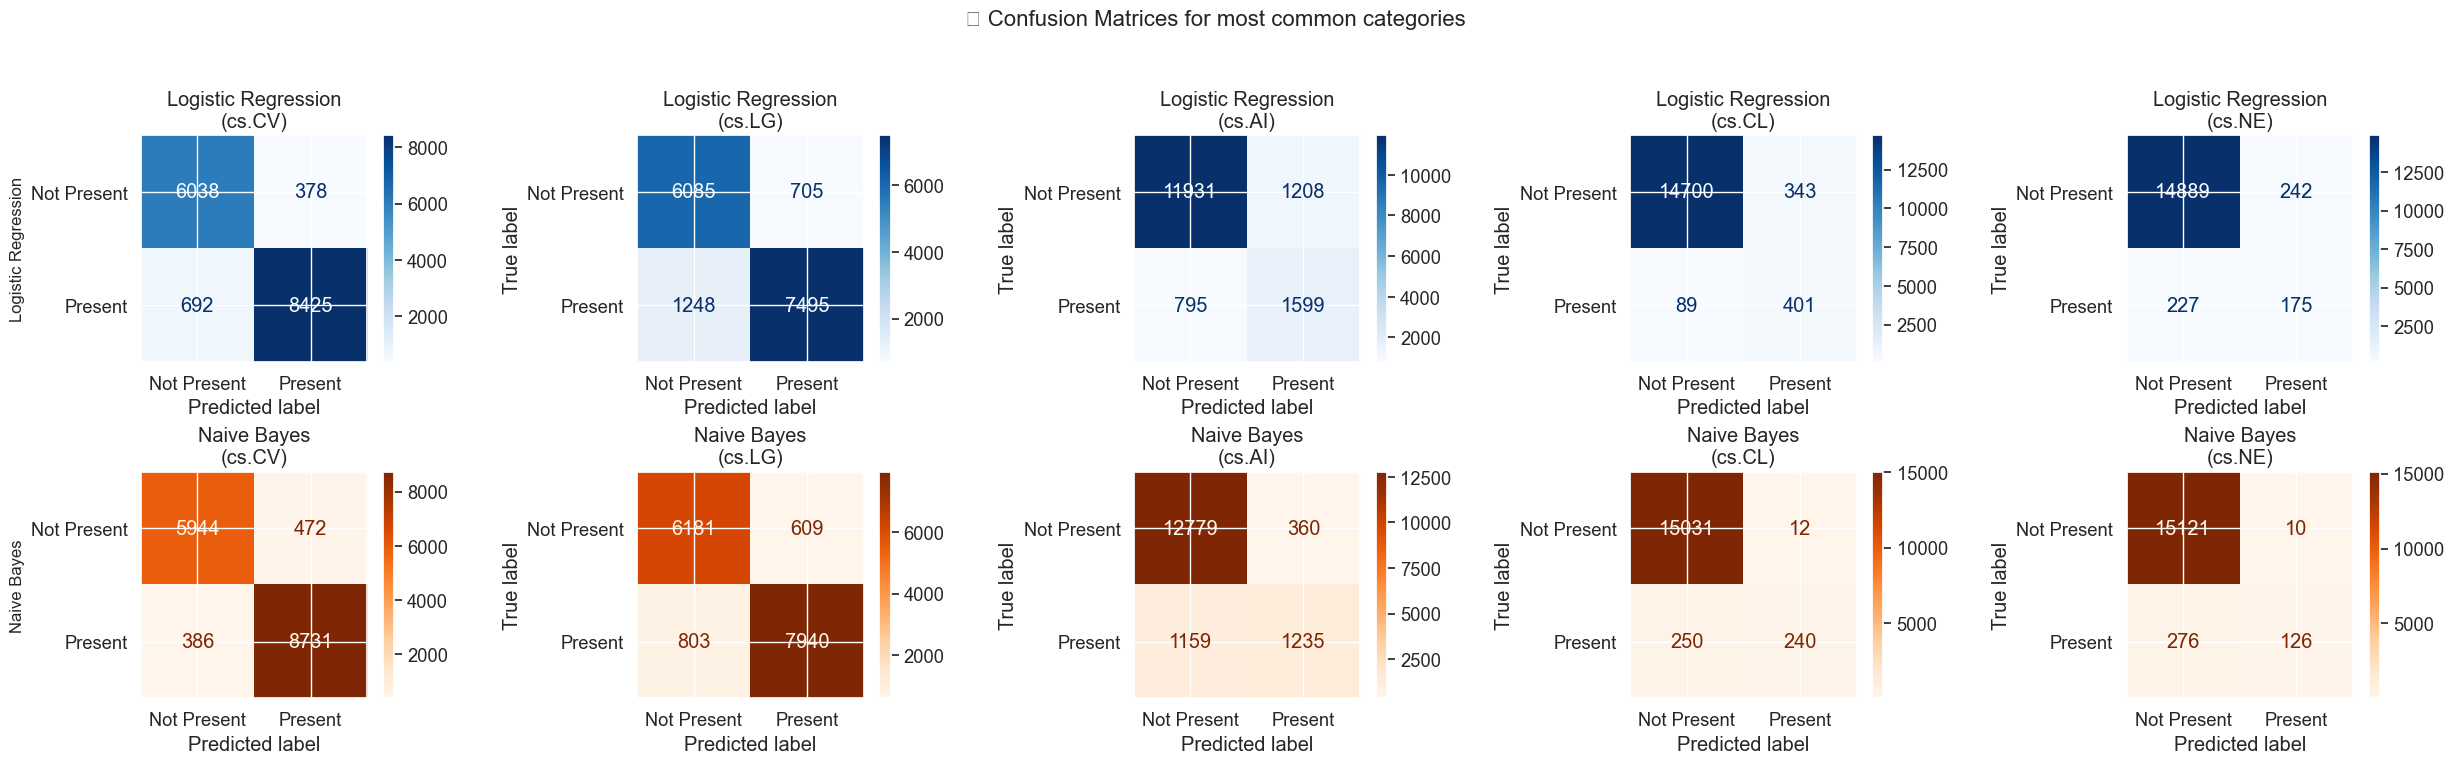

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ List of important categories
important_labels = ["cs.CV", "cs.LG", "cs.AI", "cs.CL", "cs.NE"]

# Plot setup: 2 rows (Logistic + Naive), N columns
num_labels = len(important_labels)
fig, axes = plt.subplots(2, num_labels, figsize=(num_labels * 5, 8))

for idx, label in enumerate(important_labels):
    ## --- Logistic Regression ---
    log_model = trained_models[label]
    log_encoder = label_encoders[label]
    y_true_log = log_encoder.transform(y_test[label])
    y_pred_log = log_model.predict(X_test)
    cm_log = confusion_matrix(y_true_log, y_pred_log)
    disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Present", "Present"])
    disp_log.plot(ax=axes[0, idx], cmap=plt.cm.Blues, values_format='d')
    axes[0, idx].set_title(f"Logistic Regression\n({label})")

    ## --- Naive Bayes ---
    nb_model = trained_nb_models[label]
    y_true_nb = y_test[label].astype(int)
    y_pred_nb = nb_model.predict(X_test)
    cm_nb = confusion_matrix(y_true_nb, y_pred_nb)
    disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Not Present", "Present"])
    disp_nb.plot(ax=axes[1, idx], cmap=plt.cm.Oranges, values_format='d')
    axes[1, idx].set_title(f"Naive Bayes\n({label})")

# Row titles
axes[0, 0].set_ylabel("Logistic Regression", fontsize=12)
axes[1, 0].set_ylabel("Naive Bayes", fontsize=12)

# Tidy layout
plt.suptitle("📊 Confusion Matrices for most common categories", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [67]:
import pandas as pd

# --- Metrics: WITH hyperparameter + resampling (from your original code)
with_results = {
    "Logistic Regression": {
        "Test Accuracy": 0.9096,
        "Train Accuracy": 0.9660,
        "F1 Score": 0.9109,
        "Precision": 0.9129,
        "Recall": 0.9096
    },
    "Naive Bayes": {
        "Test Accuracy": 0.9336,
        "Train Accuracy": 0.9998,
        "F1 Score": 0.9321,
        "Precision": 0.9323,
        "Recall": 0.9336
    }
}

# --- Metrics: WITHOUT hyperparameter + resampling (placeholder values — replace with actuals if different)
without_results = {
    "Logistic Regression": {
        "Test Accuracy": 0.9095,
        "Train Accuracy": 0.9350,
        "F1 Score": 0.9054,
        "Precision": 0.9072,
        "Recall": 0.9095
    },
    "Naive Bayes": {
        "Test Accuracy": 0.8810,
        "Train Accuracy": 0.9031,
        "F1 Score": 0.8728,
        "Precision": 0.8763,
        "Recall": 0.8810
    }
}

# Combine into a DataFrame
rows = []
for model in ["Logistic Regression", "Naive Bayes"]:
    with_vals = with_results[model]
    without_vals = without_results[model]

    for metric in with_vals:
        rows.append({
            "Model": model,
            "Metric": metric,
            "Existing": without_vals[metric],
            "Enhanced": with_vals[metric]
        })

df_compare = pd.DataFrame(rows)
# --- Print as table ---
print(df_compare.to_string(index=False))


              Model         Metric  Existing  Enhanced
Logistic Regression  Test Accuracy    0.9095    0.9096
Logistic Regression Train Accuracy    0.9350    0.9660
Logistic Regression       F1 Score    0.9054    0.9109
Logistic Regression      Precision    0.9072    0.9129
Logistic Regression         Recall    0.9095    0.9096
        Naive Bayes  Test Accuracy    0.8810    0.9336
        Naive Bayes Train Accuracy    0.9031    0.9998
        Naive Bayes       F1 Score    0.8728    0.9321
        Naive Bayes      Precision    0.8763    0.9323
        Naive Bayes         Recall    0.8810    0.9336


In [73]:
#MLP

In [75]:
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

# Assume `description_category_new` exists from your pipeline
# Tokenize the summaries
tokenized_summaries = description_category_new['summaries'].apply(str.split).tolist()

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_summaries, vector_size=200, window=5, min_count=2, workers=4, epochs=50)

# Create document vectors (average of word vectors)
def vectorize_summary(tokens):
    valid_tokens = [t for t in tokens if t in w2v_model.wv]
    return np.mean([w2v_model.wv[t] for t in valid_tokens], axis=0) if valid_tokens else np.zeros(w2v_model.vector_size)

X = np.vstack([vectorize_summary(tokens) for tokens in tokenized_summaries])
y = description_category_new.iloc[:, 2:].values

# Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy', Precision(), Recall()])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)



Epoch 1/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - binary_accuracy: 0.8520 - loss: 0.3524 - precision: 0.6929 - recall: 0.6093 - val_binary_accuracy: 0.8969 - val_loss: 0.2471 - val_precision: 0.8269 - val_recall: 0.6608
Epoch 2/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - binary_accuracy: 0.8928 - loss: 0.2658 - precision: 0.8272 - recall: 0.6368 - val_binary_accuracy: 0.8983 - val_loss: 0.2430 - val_precision: 0.8343 - val_recall: 0.6602
Epoch 3/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - binary_accuracy: 0.8954 - loss: 0.2558 - precision: 0.8336 - recall: 0.6428 - val_binary_accuracy: 0.8994 - val_loss: 0.2406 - val_precision: 0.8403 - val_recall: 0.6593
Epoch 4/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.8969 - loss: 0.2514 - precision: 0.8372 - recall: 0.6470 - val_binary_accuracy: 0.8991 - val_loss: 0.2407 - val_precision: 0.8424 - val_recall: 0.6551
Epoch 5/50
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.8966 - loss: 0.2515 

In [81]:
# Evaluate
results = model.evaluate(X_val, y_val)
print("Validation Results:", dict(zip(model.metrics_names, results)))
# Final evaluation on validation set (test accuracy)
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val, y_val, verbose=0)
print(f"\n✅ Test Accuracy (Validation): {val_accuracy:.4f}")

# Final evaluation on training set (training accuracy)
train_loss, train_accuracy, train_precision, train_recall = model.evaluate(X_train, y_train, verbose=0)
print(f"✅ Training Accuracy: {train_accuracy:.4f}")
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val, y_val, verbose=0)

from sklearn.metrics import classification_report
# Step 1: Predict on validation set
y_pred_probs = model.predict(X_val)

# Step 2: Convert probabilities to binary (threshold 0.5)
y_pred_binary = (y_pred_probs > 0.5).astype(int)

# Step 3: Flatten for macro/micro/wt average calculation
print("\n📋 Classification Report:")
print(classification_report(y_val, y_pred_binary, target_names=description_category_new.columns[2:]))

324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9046 - loss: 0.2290 - precision: 0.8462 - recall: 0.6813
Validation Results: {'loss': 0.23013249039649963, 'compile_metrics': 0.9027741551399231}

✅ Test Accuracy (Validation): 0.9028
✅ Training Accuracy: 0.9116
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📋 Classification Report:
              precision    recall  f1-score   support

       cs.CV       0.95      0.93      0.94      6074
       cs.LG       0.92      0.82      0.87      5795
     stat.ML       0.65      0.74      0.69      3082
       cs.AI       0.61      0.15      0.25      1653
       cs.NE       0.00      0.00      0.00       259
       cs.RO       0.63      0.20      0.30       403
     eess.IV       0.50      0.00      0.00       507
       cs.CL       0.54      0.43      0.48       306
      Others       0.60      0.22      0.32      2044

   micro avg       0.84      0.68      0.75     20123
   macro avg       0.60      0.39      0.43     20123
weighted 

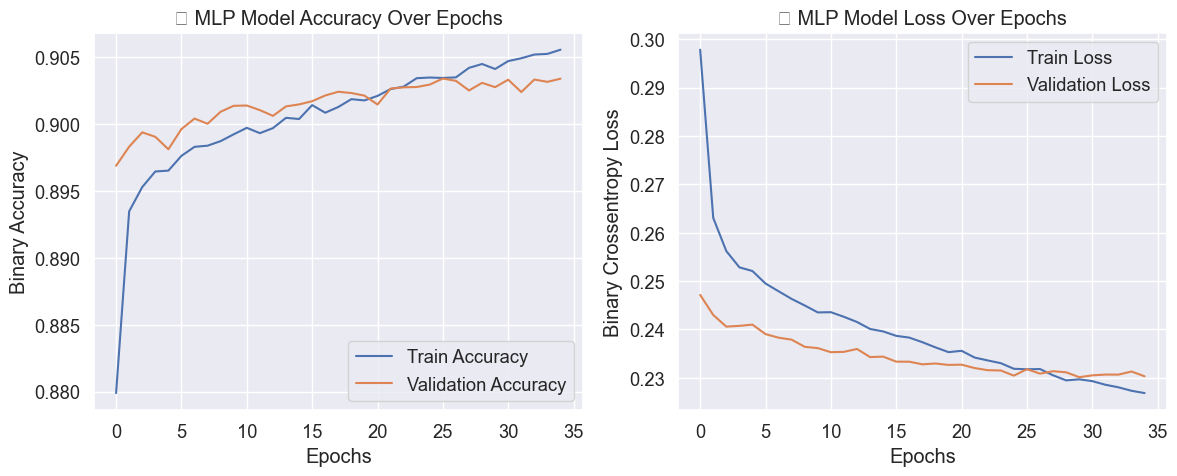

In [83]:
# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.title('🧠 MLP Model Accuracy Over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('🧠 MLP Model Loss Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
print(type(model))



<class 'str'>


In [77]:
#LSTM

In [51]:
from gensim.models import Word2Vec

# Tokenize summaries
tokenized_summaries = description_category_new['summaries'].apply(str.split).tolist()

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_summaries,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    epochs=30
)


In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 300
EMBEDDING_DIM = 100

texts = description_category_new['summaries'].tolist()

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [55]:
y = description_category_new.iloc[:, 2:].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

model = Sequential([
    Embedding(input_dim=num_words,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH,
              trainable=True),  # Fine-tuning Word2Vec

    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='sigmoid')  # Multi-label
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 2,000,000 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32,
    verbose=1
)


Epoch 1/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 420s 320ms/step - accuracy: 0.8113 - loss: 0.3284 - val_accuracy: 0.9072 - val_loss: 0.2553
Epoch 2/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 420s 324ms/step - accuracy: 0.9139 - loss: 0.2569 - val_accuracy: 0.9195 - val_loss: 0.2448
Epoch 3/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 401s 309ms/step - accuracy: 0.9242 - loss: 0.2402 - val_accuracy: 0.9234 - val_loss: 0.2388
Epoch 4/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 415s 321ms/step - accuracy: 0.9309 - loss: 0.2259 - val_accuracy: 0.9273 - val_loss: 0.2343
Epoch 5/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 463s 357ms/step - accuracy: 0.9332 - loss: 0.2133 - val_accuracy: 0.9230 - val_loss: 0.2304


In [61]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

print(f"\n🎯 Final Training Accuracy: {train_acc:.4f}")
print(f"🎯 Final Validation Accuracy: {val_acc:.4f}")



🎯 Final Training Accuracy: 0.9426
🎯 Final Validation Accuracy: 0.9230


In [63]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)
# Precision, Recall, F1 Score (weighted average)
precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

print(f"\n✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_val, y_pred, target_names=description_category_new.columns[2:], zero_division=0))


324/324 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step

✅ Precision: 0.8096
✅ Recall:    0.6963
✅ F1 Score:  0.7252

📋 Classification Report:
              precision    recall  f1-score   support

       cs.CV       0.95      0.94      0.95      6074
       cs.LG       0.92      0.83      0.88      5795
     stat.ML       0.66      0.74      0.70      3082
       cs.AI       0.61      0.22      0.32      1653
       cs.NE       0.00      0.00      0.00       259
       cs.RO       0.54      0.34      0.42       403
     eess.IV       1.00      0.01      0.02       507
       cs.CL       0.62      0.35      0.45       306
      Others       0.59      0.27      0.37      2044

   micro avg       0.84      0.70      0.76     20123
   macro avg       0.66      0.41      0.46     20123
weighted avg       0.81      0.70      0.73     20123
 samples avg       0.88      0.78      0.79     20123



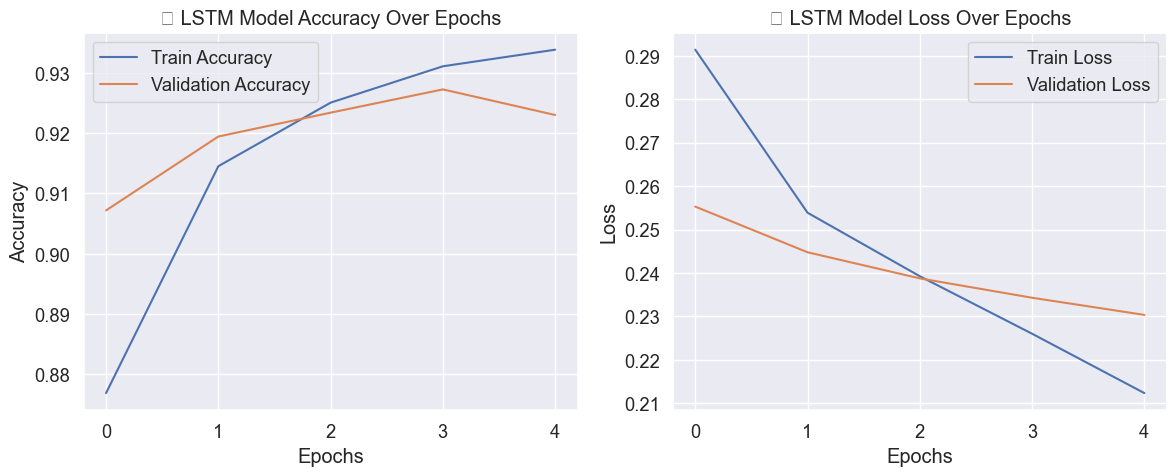

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')  # use 'accuracy'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('📊 LSTM Model Accuracy Over Epochs')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('📊 LSTM Model Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


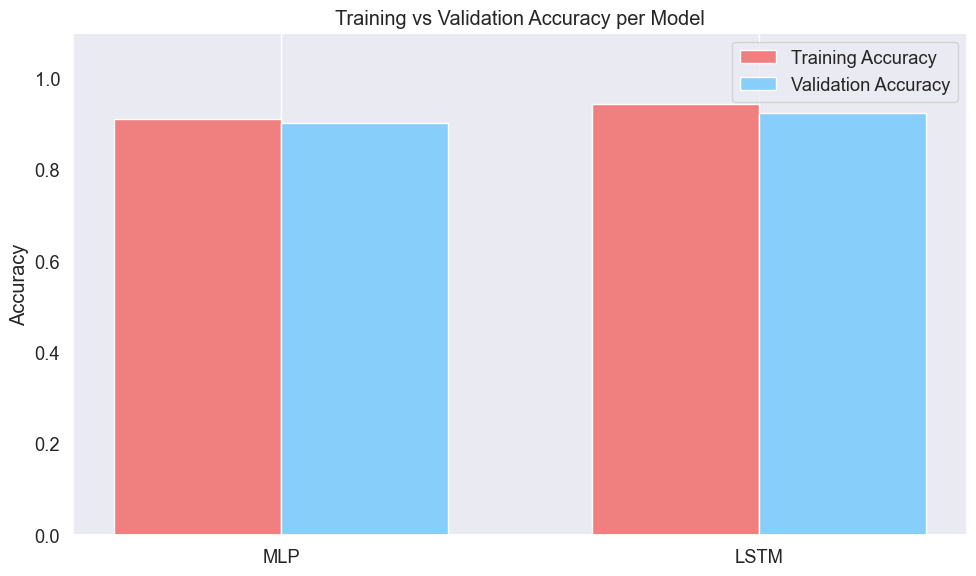

In [85]:
# Plot : Training vs Validation Accuracy
train_acc = [0.9116, 0.9426]
val_acc = [0.9028, 0.9230]
models = ['MLP', 'LSTM']
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_acc, width, label='Training Accuracy', color='lightcoral')
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy', color='lightskyblue')

plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy per Model')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
import pickle

for category, model in trained_models.items():
    with open(f"logistic_model_{category}.pkl", "wb") as f:
        pickle.dump(model, f)

    with open(f"label_encoder_{category}.pkl", "wb") as f:
        pickle.dump(label_encoders[category], f)


In [45]:
import numpy as np

# Your category labels
label_names = description_category_new.columns[2:].tolist()

# Function to process and vectorize new abstracts
def preprocess_and_vectorize(texts, w2v_model):
    def clean_text(txt):
        txt = txt.lower()
        txt = decontract(txt)
        txt = cleanPunc(txt)
        txt = keepAlpha(txt)
        txt = removeStopWords(txt)
        txt = stemming(txt)
        return txt

    def avg_w2v(tokens):
        vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

    processed = [clean_text(t) for t in texts]
    tokenized = [text.split() for text in processed]
    return np.array([avg_w2v(toks) for toks in tokenized])

# 🔮 Predict top-3 categories for each abstract
def predict_top_categories(abstracts, model, w2v_model, label_names, top_k=3):
    X_new = preprocess_and_vectorize(abstracts, w2v_model)
    probs = model.predict(X_new)

    for i, prob_vector in enumerate(probs):
        top_indices = prob_vector.argsort()[-top_k:][::-1]
        top_labels = [(label_names[j], prob_vector[j]) for j in top_indices]

        print(f"\n📄 Abstract {i+1}:")
        print(abstracts[i].strip())
        print("🔮 Top Predicted Categories:")
        for label, score in top_labels:
            print(f" - {label}: {score:.4f}")


In [46]:
user_inputs = [
    """In this paper, we introduce a novel transformer-based architecture for extractive text summarization. Our approach integrates multi-head self-attention with segment-level embedding to enhance context awareness. Unlike traditional RNN or LSTM-based models, our design leverages parallelism and positional encoding to process longer sequences more efficiently. Experiments on the CNN/DailyMail dataset demonstrate a significant improvement in ROUGE scores compared to baseline methods. We also explore fine-tuning using transfer learning from large pretrained language models, which further boosts performance.""",
    """We propose a deep convolutional neural network framework for detecting objects in urban driving scenes. The network employs residual connections and dilated convolutions to preserve spatial resolution while capturing broader context. Our model is trained and evaluated on the Cityscapes and KITTI datasets, outperforming existing methods in mean average precision (mAP) and inference speed. We further analyze the model’s performance under varying lighting conditions and propose an augmentation strategy for improved robustness.""",
    """This work presents a new gradient-free optimization technique for solving non-convex constrained problems. The algorithm combines Bayesian optimization with adaptive sampling and trust-region constraints to balance exploration and exploitation. We validate the method on a suite of benchmark problems and compare it with standard optimization libraries. Our results show that the proposed technique consistently finds better solutions with fewer evaluations, making it suitable for expensive black-box functions such as hyperparameter tuning in neural networks."""
]

predict_top_categories(user_inputs, model, w2v_model, label_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

📄 Abstract 1:
In this paper, we introduce a novel transformer-based architecture for extractive text summarization. Our approach integrates multi-head self-attention with segment-level embedding to enhance context awareness. Unlike traditional RNN or LSTM-based models, our design leverages parallelism and positional encoding to process longer sequences more efficiently. Experiments on the CNN/DailyMail dataset demonstrate a significant improvement in ROUGE scores compared to baseline methods. We also explore fine-tuning using transfer learning from large pretrained language models, which further boosts performance.
🔮 Top Predicted Categories:
 - cs.LG: 0.9106
 - cs.CL: 0.6180
 - cs.CV: 0.4847

📄 Abstract 2:
We propose a deep convolutional neural network framework for detecting objects in urban driving scenes. The network employs residual connections and dilated convolutions to preserve spatial resolution while capturing broader context. Our model 

In [47]:
user_inputs = [
    """Multi-label text classification has emerged as a critical task in natural language processing, where each document may be associated with multiple categories. This paper proposes an efficient deep learning approach that leverages a Bi-directional LSTM (BiLSTM) network with pre-trained GloVe embeddings to capture the semantic context of academic abstracts. The model is evaluated on the arXiv dataset, comprising over 100,000 research paper abstracts labeled with multiple scientific categories. Performance metrics such as precision, recall, F1-score, and subset accuracy are used for evaluation. Experimental results demonstrate that the BiLSTM-based model significantly outperforms traditional baseline classifiers like Logistic Regression and Naive Bayes. Furthermore, incorporating attention mechanisms enhances the model's interpretability by identifying the most informative parts of the text. The proposed model shows strong generalization capability and can be extended to other domains involving multi-label textual data.""",
    """Urban Heat Island (UHI) effects have become increasingly prominent due to rapid urbanization and land surface modifications. This study investigates the intensity and spatial distribution of UHI across a metropolitan region using Landsat 8 imagery and Geographic Information System (GIS) analysis. Land Surface Temperature (LST) was derived using thermal infrared bands and normalized difference vegetation index (NDVI) for multiple seasons between 2015 and 2023. Results reveal a significant correlation between reduced vegetation cover and elevated temperatures in urban cores. The study also highlights seasonal variation in UHI intensity, with summer showing the highest temperature discrepancies. Findings suggest that increasing urban greenery and sustainable planning policies could mitigate UHI impacts. This research contributes to urban environmental management and climate adaptation strategies by providing spatial insights into heat vulnerability zones.""",
    """ Early detection of lung cancer significantly improves patient survival rates, yet current screening methods are resource-intensive and prone to human error. This paper presents a convolutional neural network (CNN)-based approach for automated detection of lung nodules in computed tomography (CT) images. The dataset used includes over 10,000 annotated images from the LIDC-IDRI database. The CNN model, trained from scratch with data augmentation and regularization techniques, achieves an accuracy of 94.2%, with high sensitivity and specificity. Grad-CAM visualizations are employed to enhance model transparency, allowing clinicians to understand decision-making regions. Comparative analysis with traditional image processing methods indicates superior performance in both precision and diagnostic speed. This work highlights the potential of deep learning to support radiologists in early diagnosis and reduce the burden on healthcare systems. """
]

predict_top_categories(user_inputs, model, w2v_model, label_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

📄 Abstract 1:
Multi-label text classification has emerged as a critical task in natural language processing, where each document may be associated with multiple categories. This paper proposes an efficient deep learning approach that leverages a Bi-directional LSTM (BiLSTM) network with pre-trained GloVe embeddings to capture the semantic context of academic abstracts. The model is evaluated on the arXiv dataset, comprising over 100,000 research paper abstracts labeled with multiple scientific categories. Performance metrics such as precision, recall, F1-score, and subset accuracy are used for evaluation. Experimental results demonstrate that the BiLSTM-based model significantly outperforms traditional baseline classifiers like Logistic Regression and Naive Bayes. Furthermore, incorporating attention mechanisms enhances the model's interpretability by identifying the most informative parts of the text. The proposed model shows strong generalizatio

In [134]:
# 📝 Example input abstracts (can be changed anytime)
user_inputs = [
    """In this paper, we introduce a novel transformer-based architecture for extractive text summarization. Our approach integrates multi-head self-attention with segment-level embedding to enhance context awareness. Unlike traditional RNN or LSTM-based models, our design leverages parallelism and positional encoding to process longer sequences more efficiently. Experiments on the CNN/DailyMail dataset demonstrate a significant improvement in ROUGE scores compared to baseline methods. We also explore fine-tuning using transfer learning from large pretrained language models, which further boosts performance.""",
    
    """We propose a deep convolutional neural network framework for detecting objects in urban driving scenes. The network employs residual connections and dilated convolutions to preserve spatial resolution while capturing broader context. Our model is trained and evaluated on the Cityscapes and KITTI datasets, outperforming existing methods in mean average precision (mAP) and inference speed. We further analyze the model’s performance under varying lighting conditions and propose an augmentation strategy for improved robustness.""",
    
    """This work presents a new gradient-free optimization technique for solving non-convex constrained problems. The algorithm combines Bayesian optimization with adaptive sampling and trust-region constraints to balance exploration and exploitation. We validate the method on a suite of benchmark problems and compare it with standard optimization libraries. Our results show that the proposed technique consistently finds better solutions with fewer evaluations, making it suitable for expensive black-box functions such as hyperparameter tuning in neural networks."""
]


In [136]:
def predict_with_improved_logistic_inputs(user_inputs, trained_models, label_encoders, vectorizer, label_names, top_k=3):
    cleaned_texts = preprocess_texts(user_inputs)
    X_new = vectorizer.transform(cleaned_texts)

    all_probs = np.zeros((len(user_inputs), len(label_names)))

    for i, category in enumerate(label_names):
        model = trained_models[category]
        encoder = label_encoders[category]

        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_new)[:, 1]
        else:
            probs = model.decision_function(X_new)
            probs = (probs - probs.min()) / (probs.max() - probs.min() + 1e-6)

        all_probs[:, i] = probs

    for i, prob_vector in enumerate(all_probs):
        top_indices = prob_vector.argsort()[-top_k:][::-1]
        top_labels = [(label_names[j], prob_vector[j]) for j in top_indices]

        print(f"\n📄 Abstract {i+1}:")
        print(user_inputs[i].strip())
        print("🔮 Top Predicted Categories (Improved Logistic Regression):")
        for label, score in top_labels:
            print(f" - {label}: {score:.4f}")


In [138]:
def predict_with_improved_nb_inputs(user_inputs, trained_nb_models, vectorizer, label_names, top_k=3):
    cleaned_texts = preprocess_texts(user_inputs)
    X_new = vectorizer.transform(cleaned_texts)

    all_probs = np.zeros((len(user_inputs), len(label_names)))

    for i, category in enumerate(label_names):
        model = trained_nb_models[category]

        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_new)[:, 1]
        else:
            probs = model.decision_function(X_new)
            probs = (probs - probs.min()) / (probs.max() - probs.min() + 1e-6)

        all_probs[:, i] = probs

    for i, prob_vector in enumerate(all_probs):
        top_indices = prob_vector.argsort()[-top_k:][::-1]
        top_labels = [(label_names[j], prob_vector[j]) for j in top_indices]

        print(f"\n📄 Abstract {i+1}:")
        print(user_inputs[i].strip())
        print("🔮 Top Predicted Categories (Improved Naive Bayes):")
        for label, score in top_labels:
            print(f" - {label}: {score:.4f}")


In [140]:
predict_with_improved_logistic_inputs(user_inputs, trained_models, label_encoders, vectorizer, label_names)
predict_with_improved_nb_inputs(user_inputs, trained_nb_models, vectorizer, label_names)



📄 Abstract 1:
In this paper, we introduce a novel transformer-based architecture for extractive text summarization. Our approach integrates multi-head self-attention with segment-level embedding to enhance context awareness. Unlike traditional RNN or LSTM-based models, our design leverages parallelism and positional encoding to process longer sequences more efficiently. Experiments on the CNN/DailyMail dataset demonstrate a significant improvement in ROUGE scores compared to baseline methods. We also explore fine-tuning using transfer learning from large pretrained language models, which further boosts performance.
🔮 Top Predicted Categories (Improved Logistic Regression):
 - cs.CL: 0.8849
 - cs.LG: 0.6468
 - cs.CV: 0.3937

📄 Abstract 2:
We propose a deep convolutional neural network framework for detecting objects in urban driving scenes. The network employs residual connections and dilated convolutions to preserve spatial resolution while capturing broader context. Our model is trai